In [3]:
# Import Libraries
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('../data/California_School_District_Areas_2018-19.csv')
pd.set_option('display.max_columns', None)
df.drop(columns=['OBJECTID', 'Year', 'FedID', 'CDCode', 'CDSCode', 'UpdateNotes'], inplace=True)

In [6]:
# renaming the columns
df = df.rename(columns=
           {'DistrictName': 'SchoolName',
            'DistrictType': 'SchoolType',
            'AAcount': 'AfricanAmerican',
            'AApct': 'AfricanAmericanPct',
            'AIcount': 'AmericanIndian',
            'AIpct': 'AmericanIndianPct',
            'AScount': 'Asian',
            'ASpct': 'AsianPct',
            'FIcount': 'Filipino',
            'FIpct': 'FilipinoPct',
            'HIcount': 'Hispanic',
            'HIpct': 'HispanicPct',
            'MRcount': 'MultipleRace',
            'MRpct': 'MulitpleRacePct',
            'PIcount': 'PacificIslander',
            'PIpct': 'PacificIslanderPct',
            'WHcount': 'White',
            'WHpct': 'WhitePct',
            'NRcount': 'RaceNotReported',
            'NRpct': 'RaceNotReportedPct',
            'ELcount': 'EnglishLearner',
            'ELpct': 'EnglishLearnerPct',
            'FOScount': 'Foster',
            'FOSpct': 'FosterPct',
            'HOMcount': 'Homeless',
            'HOMpct': 'HomelessPct',
            'MIGcount': 'Migrant',
            'MIGpct': 'MigrantPct',
            'SWDcount': 'Disability',
            'SWDpct': 'DisabilityPct',
            'SEDcount': 'SocioEconDisadvantage',
            'SEDpct': 'SocioEconDisadvantagePct',
            'UPcount': 'Unduplicated',
            'UPpct': 'UnduplicatedPct'
            },
              inplace=False)

In [7]:
df

,CountyName,SchoolName,SchoolType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,EnrollTotal,EnrollCharter,EnrollNonCharter,AfricanAmerican,AfricanAmericanPct,AmericanIndian,AmericanIndianPct,Asian,AsianPct,Filipino,FilipinoPct,Hispanic,HispanicPct,MultipleRace,MulitpleRacePct,PacificIslander,PacificIslanderPct,White,WhitePct,RaceNotReported,RaceNotReportedPct,EnglishLearner,EnglishLearnerPct,Foster,FosterPct,Homeless,HomelessPct,Migrant,MigrantPct,Disability,DisabilityPct,SocioEconDisadvantage,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area
0,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07
1,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06
2,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07
3,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08
4,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,Yuba,Camptonville Elementary,Elementary,KG,12,KG,8,Differentiated Assistance,03,04,03,"22 - Suburban, Midsize",481,433,48,6,1.200000,8,1.7,2,0.400000,1,0.2,84,17.500000,51,10.6,3,0.6,320,66.500000,6,1.2,7,1.5,3,0.6,1,0.2,0,0.0,71,14.8,263,54.700001,39,81.199997,32.0,68.800003,32.0,68.800003,NaN,NaN,533.0,5.4,44.0,95.500000,16.700001,4.5,552.0,1.4,79862.488656,2.462935e+08
940,Yuba,Marysville Joint Unified,Unified,KG,12,KG,12,Differentiated Assistance,"01,03",04,"01,03","22 - Suburban, Midsize",10153,580,9573,356,3.500000,240,2.4,892,8.800000,46,0.5,4401,43.299999,387,3.8,39,0.4,3701,36.500000,91,0.9,2222,21.9,89,0.9,161,1.6,59,0.6,1144,11.3,8066,79.400002,7811,81.599998,5236.0,36.900002,5235.0,26.799999,555.0,23.600000,10516.0,10.6,627.0,86.599998,29.500000,10.0,10830.0,6.1,349629.046956,2.028548e+09
941,Yuba,Plumas Lake Elementary,Elementary,KG,8,KG,8,General Assistance,

In [8]:
df['target'] = np.where(df.ELAStdMetPct >= 61.225, 1, 0)

In [9]:
df['smallenrollment'] = np.where(df['EnrollTotal'] <= df['EnrollTotal'].quantile(0.25), 1, 0)
df['mediumenrollment'] = np.where(((df['EnrollTotal'] > df['EnrollTotal'].quantile(0.25)) & (df['EnrollTotal'] <= df['EnrollTotal'].quantile(0.5))), 1, 0)
df['largeenrollment'] = np.where(((df['EnrollTotal'] > df['EnrollTotal'].quantile(0.5)) & (df['EnrollTotal'] <= df['EnrollTotal'].quantile(0.75))), 1, 0)
df['xlenrollment'] = np.where((df['EnrollTotal'] > df['EnrollTotal'].quantile(0.75)), 1, 0)



In [10]:
df['charterpct'] = df['EnrollCharter'] / df['EnrollTotal'] * 100
df['noncharterpct'] = df['EnrollNonCharter'] / df['EnrollTotal'] * 100

In [11]:
df['unified'] = np.where(df['SchoolType'] == 'Unified', 1, 0)
df['elem'] = np.where(df['SchoolType'] == 'Elementary', 1, 0)
df['high'] = np.where(df['SchoolType'] == 'High', 1, 0)

In [12]:
df['LocaleDistrict2'] = [ x[:2] for x in df['LocaleDistrict']]

In [13]:
df['suburban'] = np.where(((df['LocaleDistrict2'] == '21') | (df['LocaleDistrict2'] == '23')), 1, 0)
df['rural'] = np.where(((df['LocaleDistrict2'] == '41') | (df['LocaleDistrict2'] == '42') | (df['LocaleDistrict2'] == '43')), 1, 0)
df['town'] = np.where(((df['LocaleDistrict2'] == '32') | (df['LocaleDistrict2'] == '33')), 1, 0)
df['city'] = np.where(((df['LocaleDistrict2'] == '12') | (df['LocaleDistrict2'] == '11') | (df['LocaleDistrict2'] == '13')), 1, 0)
df['assistance'] = np.where(df['AssistStatus'] == 'Differentiated Assistance', 1, 0)

In [14]:
df

,CountyName,SchoolName,SchoolType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,EnrollTotal,EnrollCharter,EnrollNonCharter,AfricanAmerican,AfricanAmericanPct,AmericanIndian,AmericanIndianPct,Asian,AsianPct,Filipino,FilipinoPct,Hispanic,HispanicPct,MultipleRace,MulitpleRacePct,PacificIslander,PacificIslanderPct,White,WhitePct,RaceNotReported,RaceNotReportedPct,EnglishLearner,EnglishLearnerPct,Foster,FosterPct,Homeless,HomelessPct,Migrant,MigrantPct,Disability,DisabilityPct,SocioEconDisadvantage,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,target,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,LocaleDistrict2,suburban,rural,town,city,assistance
0,Alameda,Alameda Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,18,"21 - Suburban, Large",11260,1877,9383,825,7.300000,28,0.2,2854,25.299999,683,6.1,1960,17.400000,1310,11.6,67,0.6,3244,28.799999,289,2.6,1601,14.2,26,0.2,67,0.6,0,0.0,1289,11.4,3523,31.299999,3144,33.500000,4567.0,69.400002,4587.0,59.700001,773.0,56.799999,11453.0,9.4,882.0,88.900002,58.900002,5.2,11600.0,2.6,57196.403944,4.733304e+07,1,0,0,0,1,16.669627,83.330373,1,0,0,21,1,0,0,0,1
1,Alameda,Albany City Unified,Unified,KG,12,KG,12,General Assistance,13,09,15,"21 - Suburban, Large",3682,0,3682,111,3.000000,4,0.1,1063,28.900000,47,1.3,592,16.100000,510,13.9,6,0.2,1163,31.600000,186,5.1,583,15.8,2,0.1,12,0.3,0,0.0,312,8.5,777,21.100000,1118,30.400000,1773.0,79.199997,1795.0,72.000000,302.0,62.599998,3763.0,6.4,301.0,94.699997,63.900002,1.7,3830.0,1.9,12870.772156,7.161276e+06,1,0,0,1,0,0.000000,100.000000,1,0,0,21,1,0,0,0,0
2,Alameda,Berkeley Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"12 - City, Midsize",10194,383,9811,1440,14.100000,16,0.2,731,7.200000,83,0.8,2438,23.900000,1465,14.4,14,0.1,3999,39.200001,8,0.1,953,9.3,23,0.2,265,2.6,0,0.0,1148,11.3,3331,32.700001,3275,33.400002,4614.0,66.699997,4549.0,61.700001,790.0,63.299999,10404.0,9.7,856.0,87.400002,83.300003,10.7,10534.0,1.4,44426.287405,4.376389e+07,1,0,0,0,1,3.757112,96.242888,1,0,0,12,0,0,0,1,1
3,Alameda,Castro Valley Unified,Unified,KG,12,KG,12,General Assistance,"13,15","07,09,10","18,20","21 - Suburban, Large",9269,0,9269,489,5.300000,19,0.2,2539,27.400000,420,4.5,2204,23.799999,909,9.8,47,0.5,2480,26.799999,162,1.7,1021,11.0,12,0.1,68,0.7,0,0.0,800,8.6,2284,24.600000,2739,29.600000,4844.0,68.099998,4850.0,63.200001,737.0,57.099998,9433.0,7.4,742.0,92.599998,55.900002,3.0,9532.0,2.2,142338.494091,2.833205e+08,1,0,0,0,1,0.000000,100.000000,1,0,0,21,1,0,0,0,0
4,Alameda,Emery Unified,Unified,KG,12,KG,12,Differentiated Assistance,13,09,15,"21 - Suburban, Large",743,0,743,326,43.900002,1,0.1,83,11.200000,11,1.5,185,24.900000,62,8.3,8,1.1,67,9.000000,0,0.0,160,21.5,1,0.1,7,0.9,0,0.0,55,7.4,600,80.800003,613,83.099998,376.0,37.099998,377.0,23.299999,40.0,22.500000,760.0,20.5,40.0,100.000000,40.000000,0.0,780.0,3.6,13762.869292,5.368212e+06,0,0,1,0,0,0.000000,100.000000,1,0,0,21,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,Yuba,Camptonville Elementary,Elementary,KG,12,KG,8,Differentiated Assistance,03,04,03,"22 - Suburban, Midsize",481,433,48,6,1.200000,8,1.7,2,0.400000,1,0.2,84,17.500000,51,10.6,3,0.6,320,66.500000,6,1.2,7,1.5,3,0.6,1,0.2,0,0.0,71,14.8,263,54.700001,39,81.199997,32.0,68.800003,32.0,68.800003,NaN,NaN,533.0,5.4,44.0,95.500000,16.700001,4.5,552.0,1.4,79862.488656,2.462935e+08,1,0,1,0,0,90.020790,9.979210,0,1,0,22

In [15]:
fips_df = pd.read_csv('hello_fips.csv', header=None)
fips_df['CountyName'] = fips_df[1]  
fips_df['code'] = fips_df[2].astype(object)
fips_df.drop(columns=[0, 2, 1], axis=1, inplace=True)
fips_df.drop(0, axis=0, inplace=True)

In [16]:
fips_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 1 to 58
Data columns (total 2 columns):
CountyName    58 non-null object
code          58 non-null object
dtypes: object(2)
memory usage: 1.4+ KB


In [17]:
fips_df

,CountyName,code
1,Alameda,060606001
2,Alpine,060606003
3,Amador,060606005
4,Butte,060606007
5,Calaveras,060606009
6,Colusa,060606011
7,Contra Costa,060606013
8,Del Norte,060606015
9,El Dorado,060606017
10,Fresno,060606019


In [18]:
for item in fips_df.code:
    item_new = str(item)
    item_new = item_new[4:]
    fips_df['code'] = fips_df['code'].replace(item, item_new)

In [19]:
# for item in fips_df.code:
#     item_new = str(item)
#     if len(item_new) == 1:
#         item_new = '00' + item_new
#     if len(item_new) == 2:
#         item_new = '0' + item_new
#     item_new = '06' + item_new
#     fips_df['code'] = fips_df['code'].replace(item, item_new)

In [20]:
fips_df

,CountyName,code
1,Alameda,06001
2,Alpine,06003
3,Amador,06005
4,Butte,06007
5,Calaveras,06009
6,Colusa,06011
7,Contra Costa,06013
8,Del Norte,06015
9,El Dorado,06017
10,Fresno,06019


In [21]:
df_viz = df.merge(fips_df, on='CountyName', how='left')

In [22]:
# df_viz

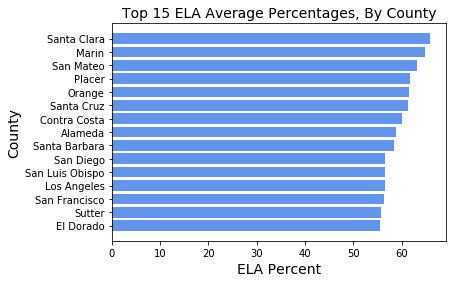

In [23]:
# top 15 schools counties
y = df.groupby('CountyName')['ELAStdMetPct'].mean().sort_values(ascending=False).head(15)
x = y.index

plt.title('Top 15 ELA Average Percentages, By County',fontsize=14);
plt.xlabel('ELA Percent', fontsize=14);
plt.ylabel('County', fontsize=14);

plt.barh(x,y, color='cornflowerblue');
plt.gca().invert_yaxis()

In [24]:
ed = df[df['CountyName'] == 'El Dorado']

In [25]:
ed.ELAStdMetPct.mean()

55.52857121428572

In [26]:
top15 = df.groupby('CountyName')['ELAStdMetPct'].mean().sort_values(ascending=False).head(15)

In [27]:
top15 = list(top15.index)

In [28]:
top15

['Santa Clara',
 'Marin',
 'San Mateo',
 'Placer',
 'Orange',
 'Santa Cruz',
 'Contra Costa',
 'Alameda',
 'Santa Barbara',
 'San Diego',
 'San Luis Obispo',
 'Los Angeles',
 'San Francisco',
 'Sutter',
 'El Dorado']

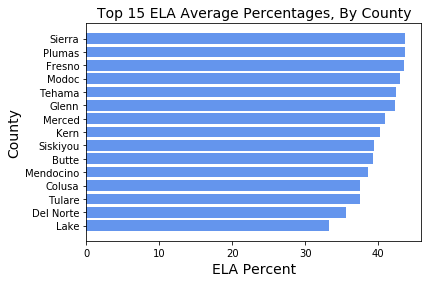

In [29]:
# top 15 schools counties
y = df.groupby('CountyName')['ELAStdMetPct'].mean().sort_values(ascending=False).tail(15)
x = y.index

plt.title('Top 15 ELA Average Percentages, By County',fontsize=14);
plt.xlabel('ELA Percent', fontsize=14);
plt.ylabel('County', fontsize=14);

plt.barh(x,y, color='cornflowerblue');
plt.gca().invert_yaxis()

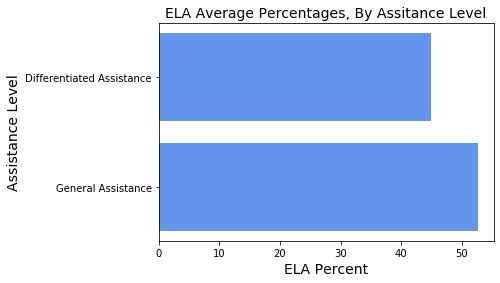

In [30]:
y = df.groupby('AssistStatus')['ELAStdMetPct'].mean().sort_values(ascending=True).head(2)
x = y.index

plt.title('ELA Average Percentages, By Assitance Level',fontsize=14);
plt.xlabel('ELA Percent', fontsize=14);
plt.ylabel('Assistance Level', fontsize=14);

plt.barh(x,y, color='cornflowerblue');
plt.gca().invert_yaxis()

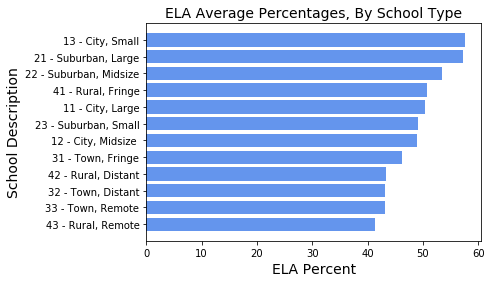

In [31]:
y = df.groupby('LocaleDistrict')['ELAStdMetPct'].mean().sort_values(ascending=True)
x = y.index

plt.title('ELA Average Percentages, By School Type',fontsize=14);
plt.xlabel('ELA Percent', fontsize=14);
plt.ylabel('School Description', fontsize=14);

plt.barh(x,y, color='cornflowerblue');

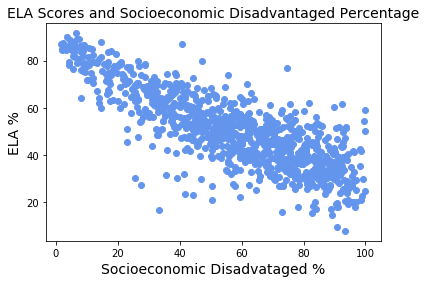

In [32]:
x = df.SocioEconDisadvantagePct
y = df.ELAStdMetPct

plt.title('ELA Scores and Socioeconomic Disadvantaged Percentage',fontsize=14);
plt.xlabel('Socioeconomic Disadvataged %', fontsize=14);
plt.ylabel('ELA %', fontsize=14);

plt.scatter(x,y, color='cornflowerblue');

#### The more socioeconomic desadvantages present, the lower the passing rate of the ELA exam

In [33]:
df.groupby('CountyName')['AfricanAmericanPct'].mean()

CountyName
Alameda             8.127778
Alpine              0.000000
Amador              0.600000
Butte               1.735714
Calaveras           0.400000
Colusa              0.575000
Contra Costa        6.577778
Del Norte           1.000000
El Dorado           0.546667
Fresno              1.840625
Glenn               0.212500
Humboldt            0.529032
Imperial            1.012500
Inyo                2.366667
Kern                2.812766
Kings               3.369231
Lake                1.266667
Lassen              1.140000
Los Angeles         5.491250
Madera              1.122222
Marin               1.994444
Mariposa            0.500000
Mendocino           0.391667
Merced              1.425000
Modoc               0.700000
Mono                0.100000
Monterey            1.004167
Napa                0.500000
Nevada              0.477778
Orange              1.537037
Placer              1.381250
Plumas              1.000000
Riverside           5.665217
Sacramento          8.523077
San

In [34]:
# Exploring the best and worst performing counties

In [35]:
santa_clara = df[df['CountyName'] == 'Santa Clara']

In [36]:
santa_clara

,CountyName,SchoolName,SchoolType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,EnrollTotal,EnrollCharter,EnrollNonCharter,AfricanAmerican,AfricanAmericanPct,AmericanIndian,AmericanIndianPct,Asian,AsianPct,Filipino,FilipinoPct,Hispanic,HispanicPct,MultipleRace,MulitpleRacePct,PacificIslander,PacificIslanderPct,White,WhitePct,RaceNotReported,RaceNotReportedPct,EnglishLearner,EnglishLearnerPct,Foster,FosterPct,Homeless,HomelessPct,Migrant,MigrantPct,Disability,DisabilityPct,SocioEconDisadvantage,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,target,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,LocaleDistrict2,suburban,rural,town,city,assistance
662,Santa Clara,Alum Rock Union Elementary,Elementary,KG,8,KG,8,General Assistance,"17,19",15,"25,27","11 - City, Large",10744,1538,9206,134,1.2,27,0.3,1268,11.800000,457,4.3,8422,78.400002,127,1.2,76,0.7,229,2.100000,4,0.0,4238,39.400002,28,0.3,81,0.8,69,0.6,1155,10.8,9002,83.800003,7886,85.699997,6167.0,37.799999,6252.0,29.200001,NaN,NaN,11326.0,13.000000,NaN,NaN,NaN,NaN,11546.0,2.2,101308.263248,2.142156e+08,0,0,0,0,1,14.314966,85.685034,0,1,0,11,0,0,0,1,0
663,Santa Clara,Berryessa Union Elementary,Elementary,KG,8,KG,8,General Assistance,"17,19","10,15",25,"11 - City, Large",6988,0,6988,112,1.6,6,0.1,3628,51.900002,874,12.5,1611,23.100000,370,5.3,45,0.6,342,4.900000,0,0.0,2343,33.500000,7,0.1,22,0.3,0,0.0,649,9.3,2252,32.200001,3679,52.599998,4520.0,65.000000,4550.0,58.299999,NaN,NaN,7166.0,5.800000,NaN,NaN,NaN,NaN,7277.0,1.9,47226.731935,5.654532e+07,1,0,0,0,1,0.000000,100.000000,0,1,0,11,0,0,0,1,0
664,Santa Clara,Cambrian,Elementary,KG,8,KG,8,General Assistance,"18,19",15,28,"11 - City, Large",3471,2447,1024,90,2.6,12,0.3,684,19.700001,71,2.0,775,22.299999,334,9.6,10,0.3,1450,41.799999,45,1.3,454,13.100000,4,0.1,9,0.3,0,0.0,420,12.1,598,17.200001,178,17.400000,2205.0,66.500000,2211.0,63.700001,NaN,NaN,3503.0,3.500000,NaN,NaN,NaN,NaN,3544.0,1.5,21550.225855,1.720687e+07,1,0,0,1,0,70.498415,29.501585,0,1,0,11,0,0,0,1,0
665,Santa Clara,Campbell Union,Elementary,KG,8,KG,8,General Assistance,"17,18,19","10,15","25,28","21 - Suburban, Large",7273,6797,476,237,3.3,15,0.2,1086,14.900000,148,2.0,3398,46.700001,477,6.6,36,0.5,1655,22.799999,221,3.0,2034,28.000000,16,0.2,37,0.5,0,0.0,731,10.1,3233,44.500000,436,91.599998,4482.0,57.500000,4523.0,51.599998,NaN,NaN,7447.0,5.200000,NaN,NaN,NaN,NaN,7567.0,2.2,61862.601808,5.299022e+07,0,0,0,0,1,93.455245,6.544755,0,1,0,21,1,0,0,0,0
666,Santa Clara,Campbell Union High,High,09,12,09,12,Differentiated Assistance,"17,18,19","10,15","25,28","11 - City, Large",8271,0,8271,205,2.5,35,0.4,1397,16.900000,197,2.4,2796,33.799999,271,3.3,58,0.7,3153,38.099998,159,1.9,557,6.700000,14,0.2,25,0.3,0,0.0,940,11.4,2416,29.200001,2310,27.900000,1864.0,67.199997,1860.0,47.400002,1995.0,58.500000,8398.0,11.400000,2002.0,90.599998,59.700001,3.4,8673.0,3.1,78020.238107,1.242624e+08,1,0,0,0,1,0.000000,100.000000,0,0,1,11,0,0,0,1,1
667,Santa Clara,Cupertino Union,Elementary,KG,8,KG,8,General Assistance,"17,18","10,13,15","24,25,28","13 - City, Small",17363,0,17363,99,0.6,26,0.1,12699,73.099998,174,1.0,886,5.100000,735,4.2,24,0.1,2515,14.500000,205,1.2,1941,11.200000,4,0.0,4,0.0,0,0.0,1192,6.9,1050,6.000000,2676,15.400000,11282.0,85.000000,11434.0,86.199997,NaN,NaN,17967.0,2.400000,NaN,NaN,NaN,NaN,18228.0,0.7,85555.946204,1.706628e+08,1,0,0,0,1,0.000000,100.000000,0,1,0,13,0,0,0,1,0
668,Santa Clara,East Side Union High,High,KG,12,09,12,Differentiated Assistance,"17,19","10,15,17","25,27,29","11 - City, Large",26568,3962,22606,546,2.1,58,0.2,8692,32.700001,1796,6.8,13418,50.500000,570,2.1,141,0.5,1307,4.900000,40,0.2,5288,19.900000,66,0.2,640,2.4,131,0

In [37]:
santa_clara.SocioEconDisadvantagePct.mean()

33.019354696774194

In [38]:
santa_clara.ELAStdMetPct.mean()

65.9096773548387

In [39]:
santa_clara.HomelessPct.mean()

0.8645161335483872

In [40]:
lake = df[df['CountyName'] == 'Lake']

In [41]:
lake

,CountyName,SchoolName,SchoolType,GradeLow,GradeHigh,GradeLowCensus,GradeHighCensus,AssistStatus,CongressUS,SenateCA,AssemblyCA,LocaleDistrict,EnrollTotal,EnrollCharter,EnrollNonCharter,AfricanAmerican,AfricanAmericanPct,AmericanIndian,AmericanIndianPct,Asian,AsianPct,Filipino,FilipinoPct,Hispanic,HispanicPct,MultipleRace,MulitpleRacePct,PacificIslander,PacificIslanderPct,White,WhitePct,RaceNotReported,RaceNotReportedPct,EnglishLearner,EnglishLearnerPct,Foster,FosterPct,Homeless,HomelessPct,Migrant,MigrantPct,Disability,DisabilityPct,SocioEconDisadvantage,SocioEconDisadvantagePct,Unduplicated,UnduplicatedPct,ELATested,ELAStdMetPct,MathTested,MathStdMetPct,CCPrepCohortCount,CCPrepPct,AbsentEligCount,AbsentPct,GradCohortCount,GradPct,UCCSUReqMetPct,DropOutPct,EnrollCumulative,SuspPct,SHAPE_Length,SHAPE_Area,target,smallenrollment,mediumenrollment,largeenrollment,xlenrollment,charterpct,noncharterpct,unified,elem,high,LocaleDistrict2,suburban,rural,town,city,assistance
229,Lake,Kelseyville Unified,Unified,KG,12,KG,12,Differentiated Assistance,"03,05",02,04,"32 - Town, Distant",1705,0,1705,13,0.8,44,2.6,4,0.2,7,0.4,726,42.599998,105,6.2,4,0.2,792,46.500000,10,0.6,252,14.800000,16,0.9,39,2.3,93,5.5,194,11.4,1377,80.800003,1381,81.099998,869.0,32.900002,868.0,18.200001,137.0,37.200001,1816.0,14.900000,143.0,86.699997,26.600000,6.3,1853.0,7.0,131353.716974,5.416682e+08,0,0,1,0,0,0.000000,100.000000,1,0,0,32,0,0,1,0,1
230,Lake,Konocti Unified,Unified,KG,12,KG,12,Differentiated Assistance,"03,05",02,04,"32 - Town, Distant",3575,0,3575,97,2.7,97,2.7,10,0.3,10,0.3,1651,46.200001,249,7.0,3,0.1,1434,40.099998,24,0.7,774,21.700001,12,0.3,266,7.4,162,4.5,454,12.7,3094,86.500000,3085,86.300003,1757.0,27.400000,1758.0,14.400000,235.0,15.300000,3777.0,29.200001,249.0,58.599998,33.599998,18.5,3899.0,10.1,227978.500680,1.418709e+09,0,0,0,1,0,0.000000,100.000000,1,0,0,32,0,0,1,0,1
231,Lake,Lakeport Unified,Unified,KG,12,KG,12,Differentiated Assistance,"03,05",02,04,"32 - Town, Distant",1472,0,1472,19,1.3,154,10.5,17,1.2,14,1.0,466,31.700001,54,3.7,2,0.1,720,48.900002,26,1.8,122,8.300000,9,0.6,59,4.0,52,3.5,165,11.2,967,65.699997,978,66.400002,749.0,29.299999,751.0,21.200001,96.0,31.299999,1555.0,18.600000,99.0,90.900002,26.700001,5.1,1600.0,11.7,114754.503220,5.516316e+08,0,0,1,0,0,0.000000,100.000000,1,0,0,32,0,0,1,0,1
232,Lake,Lucerne Elementary,Elementary,KG,8,KG,8,General Assistance,03,02,04,"32 - Town, Distant",253,0,253,3,1.2,15,5.9,0,0.0,0,0.0,73,28.900000,21,8.3,0,0.0,141,55.700001,0,0.0,18,7.100000,1,0.4,25,9.9,8,3.2,31,12.3,229,90.500000,227,89.699997,172.0,29.600000,172.0,20.900000,NaN,NaN,292.0,16.400000,NaN,NaN,NaN,NaN,307.0,4.6,65726.170693,1.908861e+08,0,1,0,0,0,0.000000,100.000000,0,1,0,32,0,0,1,0,0
233,Lake,Middletown Unified,Unified,KG,12,KG,12,General Assistance,05,02,04,"42 - Rural, Distant",1747,268,1479,6,0.3,18,1.0,9,0.5,11,0.6,444,25.400000,105,6.0,3,0.2,1150,65.800003,1,0.1,96,5.500000,2,0.1,53,3.0,7,0.4,199,11.4,926,53.000000,786,53.099998,756.0,49.599998,761.0,33.400002,126.0,37.299999,1881.0,17.400000,167.0,88.599998,29.700001,9.0,1915.0,1.6,134455.174448,6.419385e+08,0,0,1,0,0,15.340584,84.659416,1,0,0,42,0,1,0,0,0
234,Lake,Upper Lake Unified,Unified,KG,12,KG,12,Differentiated Assistance,03,02,04,"23 - Suburban, Small",855,0,855,11,1.3,76,8.9,8,0.9,2,0.2,263,30.799999,42,4.9,0,0.0,453,53.000000,0,0.0,43,5.000000,10,1.2,20,2.3,9,1.1,82,9.6,660,77.199997,642,75.099998,412.0,30.299999,407.0,19.700001,83.0,9.600000,888.0,24.700001,88.0,73.900002,0.000000,12.5,912.0,6.0,360478.662033,2.571308e+09,0,0,1,0,0,0.000000,100.000000,1,0,0,23,1,0,0,0,1


In [42]:
lake.SocioEconDisadvantagePct.mean()

75.61666616666666

In [43]:
lake.ELAStdMetPct.mean()

33.183333

In [44]:
lake.HomelessPct.mean()

4.816666616666667

In [45]:
lake.EnglishLearnerPct.mean()

10.400000183333333

In [46]:
santa_clara.EnglishLearnerPct.mean()

21.470967841935483

In [47]:
counties = list(df_viz.CountyName.unique())

In [48]:
eng = []
absent = []
enroll = []
englearner = []
ssuburban = []
srural = []
stown = []
scity = []
socioecon = []

for item in counties:
    c_df = df[df['CountyName'] == item]
    
    eng.append(c_df.ELAStdMetPct.mean())
    enroll.append(c_df.EnrollTotal.mean())
    englearner.append(c_df.EnglishLearnerPct.mean())
    absent.append(c_df.AbsentPct.mean())
    ssuburban.append(c_df.suburban.sum())
    srural.append(c_df.rural.sum())
    stown.append(c_df.town.sum())
    scity.append(c_df.city.sum())
    socioecon.append(c_df.SocioEconDisadvantagePct.mean())


In [49]:
county_dict = [{'CountyName':counties,'Score':eng,'Absent':absent,'Enroll':enroll,'EngLearner':englearner,'Suburban':ssuburban,'Rural':srural,'Town':stown,'City':scity, 'SocioEconDis':socioecon} for counties,eng,absent,enroll,englearner,ssuburban,srural,stown,scity,socioecon in zip(counties,eng,absent,enroll,englearner, ssuburban,srural,stown,scity,socioecon)]





In [50]:
county_dict

[{'CountyName': 'Alameda',
  'Score': 58.83333344444444,
  'Absent': 13.350000077777777,
  'Enroll': 12455.944444444445,
  'EngLearner': 17.566666722222223,
  'Suburban': 11,
  'Rural': 2,
  'Town': 0,
  'City': 5,
  'SocioEconDis': 39.077777766666664},
 {'CountyName': 'Alpine',
  'Score': 51.900002,
  'Absent': 20.700001,
  'Enroll': 79.0,
  'EngLearner': 0.0,
  'Suburban': 0,
  'Rural': 1,
  'Town': 0,
  'City': 0,
  'SocioEconDis': 73.400002},
 {'CountyName': 'Amador',
  'Score': 47.200001,
  'Absent': 14.6,
  'Enroll': 3962.0,
  'EngLearner': 3.0,
  'Suburban': 0,
  'Rural': 0,
  'Town': 1,
  'City': 0,
  'SocioEconDis': 42.5},
 {'CountyName': 'Butte',
  'Score': 39.30833341666667,
  'Absent': 22.871428721428572,
  'Enroll': 2179.714285714286,
  'EngLearner': 7.821428614285714,
  'Suburban': 0,
  'Rural': 7,
  'Town': 5,
  'City': 1,
  'SocioEconDis': 71.42857135714286},
 {'CountyName': 'Calaveras',
  'Score': 49.9750005,
  'Absent': 15.4250005,
  'Enroll': 1208.75,
  'EngLearner':

In [51]:
countydf = pd.DataFrame.from_dict(county_dict)

In [52]:
df_viz = df.merge(fips_df, on='CountyName', how='left')

In [53]:
countydf = countydf.merge(fips_df, on='CountyName', how='left')

In [54]:
countydf['Score'] = countydf['Score'].round().astype('int64')

In [55]:
countydf['Score'] = countydf['Score'].round().astype('int64')

In [56]:
countydf

,CountyName,Score,Absent,Enroll,EngLearner,Suburban,Rural,Town,City,SocioEconDis,code
0,Alameda,59,13.350000,12455.944444,17.566667,11,2,0,5,39.077778,06001
1,Alpine,52,20.700001,79.000000,0.000000,0,1,0,0,73.400002,06003
2,Amador,47,14.600000,3962.000000,3.000000,0,0,1,0,42.500000,06005
3,Butte,39,22.871429,2179.714286,7.821429,0,7,5,1,71.428571,06007
4,Calaveras,50,15.425000,1208.750000,4.300000,0,2,2,0,50.075000,06009
5,Colusa,38,9.150000,1161.000000,36.450001,0,1,3,0,76.900002,06011
6,Contra Costa,60,9.405882,9554.888889,11.305556,13,3,0,2,31.533334,06013
7,Del Norte,36,18.900000,3902.000000,7.600000,0,0,1,0,68.400002,06015
8,El Dorado,56,11.580000,1782.466667,6.013333,3,9,1,0,39.679999,06017
9,Fresno,44,11.131250,6327.281250,27.296875,2,14,3,5,75.250000,06019


In [57]:
# Reference:
# https://medium.com/@plotlygraphs/what-is-a-fips-code-county-level-charts-in-python-4eff383a4cf6
# https://plot.ly/~Dreamshot/9218/import-plotly-plotly-version-/#/

In [58]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
from plotly.offline import *
from colour import Color
# To initiate ploty to run offline
# init_notebook_mode(connected=True)

# counties = countydf['code'].tolist()
# score = countydf['Absent'].tolist()

# heatmap_color = [
#     'snow',
#     'mistyrose',
#     'tomato',    
#     'crimson',   
#     'darkred'
# ]


# endpts = list(range(0,40,10))


# fig = ff.create_choropleth(
#       fips = counties, values = score, colorscale = heatmap_color,
#       show_state_data = True, scope = ['CA'],
#       binning_endpoints=endpts,
#       show_hover=True,
#       county_outline={'color': 'rgb(15,15,55)', 'width': 1},
#       state_outline={'color': 'rgb(15,15,55)', 'width': 1},
#       legend_title='Absenteeism', title='Average Absenteeism by County'
#    )


# iplot(fig)
# # plotly.offline.plot(fig, filename='cali_absent.html')

ModuleNotFoundError: No module named 'colour'

In [59]:
counties = countydf['code'].tolist()
score = countydf['SocioEconDis'].tolist()

heatmap_color = [
    'black',
    'black',
    'black',
    'deepskyblue', # 20-30
    'lightskyblue', # 30-40
    'aliceblue', # 40-50
    'white', # 50-60
    'mistyrose', # 60-70
    'tomato', # 70-80
    'orangered' # 80+
    
]

endpts = list(range(0,90,10))

fig = ff.create_choropleth(
      fips = counties, values = score, colorscale = heatmap_color,
      show_state_data = True, scope = ['CA'],
      binning_endpoints=endpts,
      county_outline={'color': 'rgb(15,15,55)', 'width': 1},
      state_outline={'color': 'rgb(15,15,55)', 'width': 1},
      legend_title='Socioeconimic Disadvataged Student', title='Socioeconimic Disadvataged Student Rate by County'
   )


iplot(fig)
# plotly.offline.plot(fig, filename='cali_absent.html')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



ValueError: 
The create_choropleth figure factory requires the plotly-geo package.
Install using pip with:

$ pip install plotly-geo

Or, install using conda with

$ conda install -c plotly plotly-geo


In [ ]:
counties = countydf['code'].tolist()
score = countydf['Score'].tolist()


heatmap_color = [
    'springgreen',
    'turquoise',
    'paleturquoise',
    'lightskyblue', 
    'orangered', # 30-40
    'mistyrose', # 40-50
    'white', # 50-60
    'lightskyblue', # 60-70
    'darkviolet'
    
]

endpts = list(range(0,80,10))

fig = ff.create_choropleth(
      fips = counties, values = score, colorscale = heatmap_color,
      show_state_data = True, scope = ['CA'],
      binning_endpoints=endpts,
      county_outline={'color': 'rgb(15,15,55)', 'width': 1},
      state_outline={'color': 'rgb(15,15,55)', 'width': 1},
      legend_title='English Passing Rate', title='Average English Passing Rate by County'
   )


iplot(fig)
# plotly.offline.plot(fig, filename='cali_absent.html')